In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [3]:
df = pd.read_csv("../data/curvaDI_20251122.csv", sep=";", encoding="latin1")

df.columns = df.iloc[3] 
df = df.drop(df.index[:4])   
df = df.iloc[:73]           
df = df.reset_index(drop=True)
df.iloc[:, 2] = df.iloc[:, 2].str.replace(',', '.', regex=False).astype(float)
df = df[["Vertices", "ETTJ PREF"]]

In [4]:
df

3,Vertices,ETTJ PREF
0,252,13.7401
1,378,13.2431
2,504,12.9998
3,630,12.9318
4,756,12.9675
...,...,...
68,Vertices,NaN
69,21,NaN
70,42,NaN
71,63,NaN


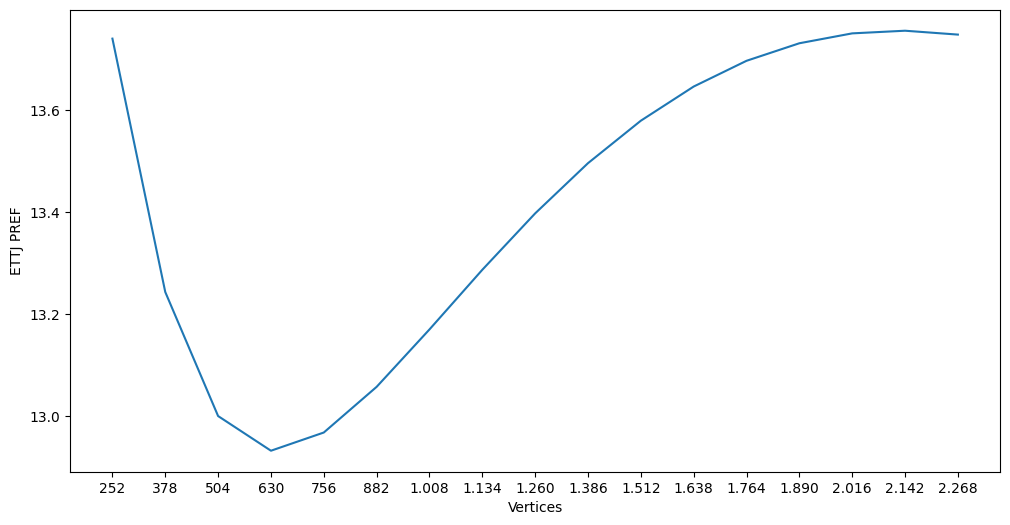

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel(df.columns[0])  
plt.ylabel(df.columns[1])  
plt.title("")
plt.show()

In [6]:
vertices_clean = (
    df["Vertices"]
    .astype(str)
    .str.replace(".", "", regex=False)   
    .str.replace(",", "", regex=False)  
)

df["days"] = pd.to_numeric(vertices_clean, errors="coerce")
df["rate"] = pd.to_numeric(df["ETTJ PREF"], errors="coerce") / 100.0
df = df.dropna(subset=["days", "rate"]).reset_index(drop=True)
df["year_frac"] = df["days"] / 252
df["discount_factor"] = np.exp(-df["rate"] * df["year_frac"])

In [7]:
df

3,Vertices,ETTJ PREF,days,rate,year_frac,discount_factor
0,252,13.7401,252.0,0.137401,1.0,0.871621
1,378,13.2431,378.0,0.132431,1.5,0.819840
2,504,12.9998,504.0,0.129998,2.0,0.771055
3,630,12.9318,630.0,0.129318,2.5,0.723760
4,756,12.9675,756.0,0.129675,3.0,0.677717
5,882,13.0571,882.0,0.130571,3.5,0.633181
6,1.008,13.1697,1008.0,0.131697,4.0,0.590499
7,1.134,13.2867,1134.0,0.132867,4.5,0.549965
8,1.260,13.3973,1260.0,0.133973,5.0,0.511778
9,1.386,13.4958,1386.0,0.134958,5.5,0.476033


In [8]:
def get_discount_factor(days: int, curve_df: pd.DataFrame) -> float:

    if days <= curve_df["days"].iloc[0]:
        return float(curve_df["discount_factor"].iloc[0])
    if days >= curve_df["days"].iloc[-1]:
        return float(curve_df["discount_factor"].iloc[-1])

    before = curve_df[curve_df["days"] <= days].iloc[-1]
    after  = curve_df[curve_df["days"] >= days].iloc[0]

    t0, t1 = before["year_frac"], after["year_frac"]
    d0, d1 = np.log(before["discount_factor"]), np.log(after["discount_factor"])

    t = days / 252
    d = d0 + (d1 - d0) * (t - t0) / (t1 - t0)

    return float(np.exp(d))

In [9]:
get_discount_factor(600, df)

0.7347508553665442